Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import time
import datetime as dt
from pandas.plotting import scatter_matrix
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

Importing Data

In [2]:
data=pd.read_excel('Online Retail.xlsx')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
data.shape

(541909, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data_null = round(100*(data.isnull().sum())/len(data),2)
data_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [9]:
data['CustomerID_is_null'] = [1 if i == True else 0 for i in data.CustomerID.isnull()]

In [10]:
data1 = data[data['CustomerID_is_null'] == 1]

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135080 entries, 622 to 541540
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           135080 non-null  object        
 1   StockCode           135080 non-null  object        
 2   Description         133626 non-null  object        
 3   Quantity            135080 non-null  int64         
 4   InvoiceDate         135080 non-null  datetime64[ns]
 5   UnitPrice           135080 non-null  float64       
 6   CustomerID          0 non-null       float64       
 7   Country             135080 non-null  object        
 8   CustomerID_is_null  135080 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 10.3+ MB


In [12]:
data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,1
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1


In [13]:
print("Number of orders in data1:", data1['InvoiceNo'].nunique())
print("Avg. number of products per order in data1: ", round(data1['StockCode'].count() / data1['InvoiceNo'].nunique(),2) )
print("Avg. number of products per order in data: ",  round(data['StockCode'].count() / data['InvoiceNo'].nunique(),2) )

Number of orders in data1: 3710
Avg. number of products per order in data1:  36.41
Avg. number of products per order in data:  20.92


In [14]:
data['NewID'] = data['CustomerID']
data.loc[data['CustomerID_is_null'] == 1, ['NewID']] = data['InvoiceNo']
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22040\373423586.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[536414, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544,

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850.0


In [15]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           541909 non-null  object        
 1   StockCode           541909 non-null  object        
 2   Description         540455 non-null  object        
 3   Quantity            541909 non-null  int64         
 4   InvoiceDate         541909 non-null  datetime64[ns]
 5   UnitPrice           541909 non-null  float64       
 6   CustomerID          406829 non-null  float64       
 7   Country             541909 non-null  object        
 8   CustomerID_is_null  541909 non-null  int64         
 9   NewID               541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 41.3+ MB


In [17]:
data['NewID'] = data['NewID'].astype(str).str.replace(r'\D+', '', regex=True)

# Convert to integer
data['NewID'] = pd.to_numeric(data['NewID'])

# Check if the 'C' character was removed in the NewID column
print(data[data['NewID'] == 580605])

       InvoiceNo  StockCode Description  Quantity         InvoiceDate  \
524602   C580605  AMAZONFEE  AMAZON FEE        -1 2011-12-05 11:36:00   

        UnitPrice  CustomerID         Country  CustomerID_is_null   NewID  
524602   17836.46         NaN  United Kingdom                   1  580605  


In [18]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,178500
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,178500
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500


In [19]:
Num_CustomerID = data['CustomerID'].nunique()
Num_data1_InvoiceNo = data1['InvoiceNo'].nunique()
Num_NewID = data['NewID'].nunique()
print("Number of Customers:", data['CustomerID'].nunique())
print("Number of Orders in data1:", data1['InvoiceNo'].nunique())
print("Number of Customers + Number of Orders in data1:", Num_CustomerID + Num_data1_InvoiceNo)
print("Number of New ID's:", data['NewID'].nunique())

Number of Customers: 4372
Number of Orders in data1: 3710
Number of Customers + Number of Orders in data1: 8082
Number of New ID's: 8082


EDA

In [20]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerID_is_null,NewID
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,0.249267,253869.471330
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,0.000000,123460.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,0.000000,143670.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,0.000000,162490.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,0.000000,182830.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,1.000000,581498.000000
std,218.081158,NaN,96.759853,1713.600303,0.432589,176036.804611


In [21]:
cancelled_orders = data[data['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0,145270
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0,153110
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0,175480
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,175480
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,175480


In [22]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID


In [23]:
print("There were", len(cancelled_orders), "cancelled orders.")
total_orders = data['InvoiceNo'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format(number_cancelled / total_orders * 100))

There were 9288 cancelled orders.
Percentage of orders cancelled: 35.86% 


In [24]:
groupby_customers = pd.DataFrame(data.groupby('NewID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
NewID,
123460,2
123470,7
123480,4
123490,1
123500,1


In [25]:
groupby_customers.describe()

,InvoiceNo
count,8082.000000
mean,3.204652
std,7.162265
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,248.000000


In [26]:
data['Total_Cost'] = data['Quantity'] * data['UnitPrice']

In [27]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,178500,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,178500,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34


C:\Users\Admin\AppData\Local\Temp\ipykernel_22040\2672971365.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")


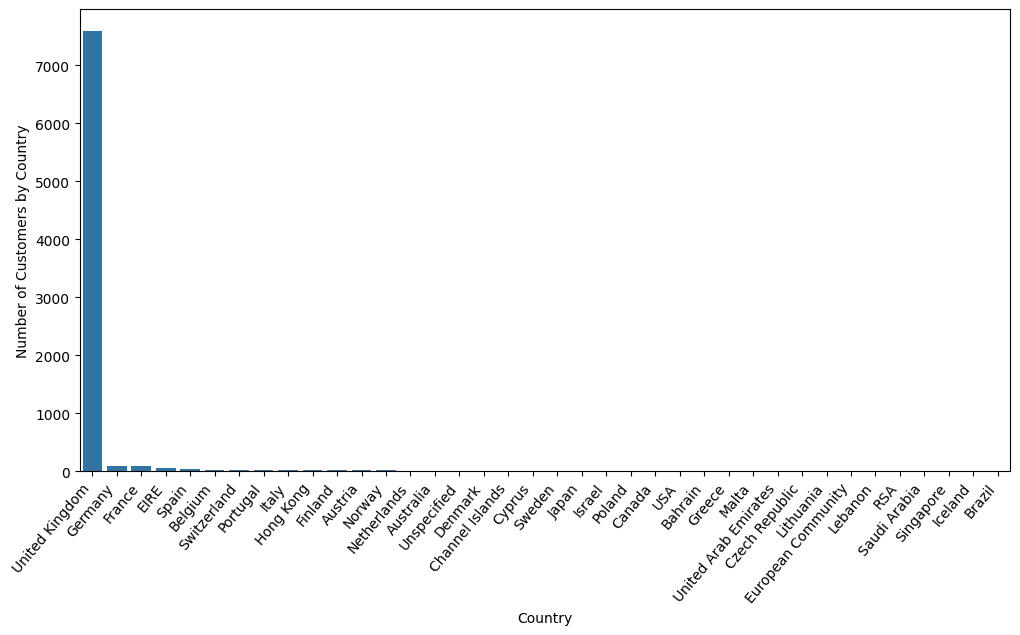

In [28]:
country_data = pd.DataFrame(data.groupby('Country')['NewID'].nunique())
country_data.columns = ['Number of Customers by Country']
country_data.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_data.index, y=country_data['Number of Customers by Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

Exploring UK Market

In [29]:
data_uk = data[data['Country']=='United Kingdom']
data_uk.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerID_is_null,NewID,Total_Cost
count,495478.000000,495478,495478.000000,361878.000000,495478.000000,495478.000000,495478.000000
mean,8.605486,2011-07-04 05:01:41.098131456,4.532422,15547.871368,0.269639,264016.667176,16.525065
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,0.000000,123460.000000,-168469.600000
25%,1.000000,2011-03-27 12:06:00,1.250000,14194.000000,0.000000,146390.000000,3.290000
50%,3.000000,2011-07-19 11:47:00,2.100000,15514.000000,0.000000,166390.000000,8.290000
75%,10.000000,2011-10-20 10:41:00,4.130000,16931.000000,1.000000,538566.000000,16.630000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000,1.000000,581498.000000,168469.600000
std,227.588756,NaN,99.315438,1594.402590,0.443772,179302.718367,394.839116


In [30]:
print("Percentage of customers from the UK: ", round(data_uk['NewID'].nunique() * 100 / data['NewID'].nunique(),2),"%" )
print("Number of transactions: ", data_uk['InvoiceNo'].nunique())
print("Number of products Bought: ", data_uk['StockCode'].nunique())
print("Number of customers:", data_uk['NewID'].nunique())

Percentage of customers from the UK:  93.88 %
Number of transactions:  23494
Number of products Bought:  4065
Number of customers: 7587


In [31]:
data_uk.shape

(495478, 11)

In [32]:
data_uk = data_uk[data_uk['Quantity']>0]
data_uk.shape

(486286, 11)

In [33]:
data_uk.dropna(subset=['CustomerID'],how='all',inplace=True)
data_uk.shape

(354345, 11)

In [34]:
print("Number of transactions: ", data_uk['InvoiceNo'].nunique())
print("Number of products bought: ",data_uk['StockCode'].nunique())
print("Number of customers:", data_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(data_uk['CustomerID'].isnull().sum() * 100 / len(data),2),"%" )

Number of transactions:  16649
Number of products bought:  3645
Number of customers: 3921
Percentage of customers NA:  0.0 %


In [35]:
data_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [36]:
now = dt.date(2011,12,9)

In [37]:
data_uk['Date'] = data_uk['InvoiceDate'].dt.date

In [38]:
data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID,Total_Cost,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,178500,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,178500,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34,2010-12-01


In [39]:
recency = data_uk.groupby(by='CustomerID', as_index=False)['Date'].max()
recency.columns = ['CustomerID', 'Last_Purchase_Date']
recency.head()

,CustomerID,Last_Purchase_Date
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [40]:
recency['Recency'] = recency['Last_Purchase_Date'].apply(lambda x: (now - x).days)
recency.head()

,CustomerID,Last_Purchase_Date,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [41]:
uk_copy = data_uk
uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
frequency = uk_copy.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,210
3,12749.0,5
4,12820.0,4


In [42]:
monetary = data_uk.groupby(by='CustomerID',as_index=False).agg({'Total_Cost': 'sum'})
monetary.columns = ['CustomerID', 'Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,689.49
2,12748.0,3841.31
3,12749.0,98.35
4,12820.0,58.20


In [43]:
df_merge = recency.merge(frequency, on='CustomerID')
df_merge.head()

,CustomerID,Last_Purchase_Date,Recency,Frequency
0,12346.0,2011-01-18,325,1
1,12747.0,2011-12-07,2,11
2,12748.0,2011-12-09,0,210
3,12749.0,2011-12-06,3,5
4,12820.0,2011-12-06,3,4


In [44]:
#Merge with monetary dataframe
RFM1 = df_merge.merge(monetary,on='CustomerID')
RFM1.set_index('CustomerID',inplace=True)
RFM1.head()

,Last_Purchase_Date,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,2011-01-18,325,1,77183.60
12747.0,2011-12-07,2,11,689.49
12748.0,2011-12-09,0,210,3841.31
12749.0,2011-12-06,3,5,98.35
12820.0,2011-12-06,3,4,58.20


In [45]:
quantiles = RFM1.quantile(q=[0.25,0.5,0.75])
quantiles

,Last_Purchase_Date,Recency,Frequency,Monetary
0.25,2011-07-20,17.0,1.0,17.7
0.50,2011-10-20,50.0,2.0,45.4
0.75,2011-11-22,142.0,5.0,124.5


In [46]:
quantiles.to_dict()

{'Last_Purchase_Date': {0.25: datetime.date(2011, 7, 20),
  0.5: datetime.date(2011, 10, 20),
  0.75: datetime.date(2011, 11, 22)},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.700000000000003, 0.5: 45.4, 0.75: 124.5}}

In [47]:
#Arguments (x= value, p = recency, monetary_value, frequency, d = quartiles dict)
def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

#Arguments (x= value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [48]:
rfm_segmentation = RFM1
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(Rscore, args=('Recency',quantiles))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMscore, args=('Frequency',quantiles))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMscore, args=('Monetary',quantiles))

In [49]:
rfm_segmentation.head()

,Last_Purchase_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,,
12346.0,2011-01-18,325,1,77183.60,1,1,4
12747.0,2011-12-07,2,11,689.49,4,4,4
12748.0,2011-12-09,0,210,3841.31,4,4,4
12749.0,2011-12-06,3,5,98.35,4,3,3
12820.0,2011-12-06,3,4,58.20,4,3,3


In [50]:
rfm_segmentation['RFM_Score'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Last_Purchase_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,,
12346.0,2011-01-18,325,1,77183.60,1,1,4,114
12747.0,2011-12-07,2,11,689.49,4,4,4,444
12748.0,2011-12-09,0,210,3841.31,4,4,4,444
12749.0,2011-12-06,3,5,98.35,4,3,3,433
12820.0,2011-12-06,3,4,58.20,4,3,3,433


In [51]:
rfm_segmentation[rfm_segmentation['RFM_Score']=='444'].head(10)

,Last_Purchase_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,,
12747.0,2011-12-07,2,11,689.49,4,4,4,444
12748.0,2011-12-09,0,210,3841.31,4,4,4,444
12828.0,2011-12-07,2,6,154.80,4,4,4,444
12839.0,2011-12-07,2,14,233.91,4,4,4,444
12841.0,2011-12-05,4,25,328.74,4,4,4,444
12877.0,2011-12-06,3,12,365.79,4,4,4,444
12901.0,2011-12-01,8,28,9230.45,4,4,4,444
12919.0,2011-12-01,8,6,267.40,4,4,4,444
12921.0,2011-11-30,9,37,1014.11,4,4,4,444


In [52]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFM_Score']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFM_Score']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFM_Score']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFM_Score']=='111']))

Best Customers:  370
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  65
Lost Customers:  11
Lost Cheap Customers:  377


Applying Classification Models

In [53]:
RFM2 = RFM1.drop(['R_Quartile','F_Quartile','M_Quartile','RFM_Score','Last_Purchase_Date'],axis=1)
RFM2.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,689.49
12748.0,0,210,3841.31
12749.0,3,5,98.35
12820.0,3,4,58.20


In [54]:
RFM2.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.273779,-0.030123
Frequency,-0.273779,1.000000,0.163225
Monetary,-0.030123,0.163225,1.000000


<Axes: >

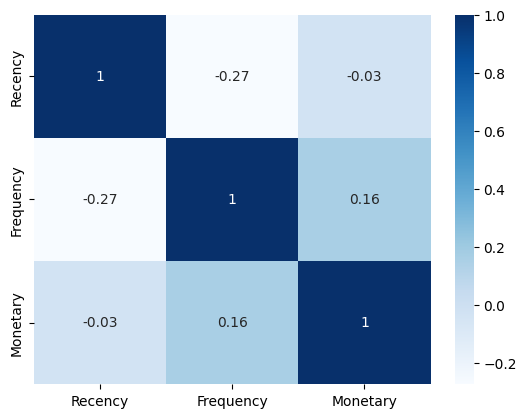

In [55]:
sns.heatmap(RFM2.corr(),cmap="Blues",annot=True)

Text(0.5, 0, 'Attributes')

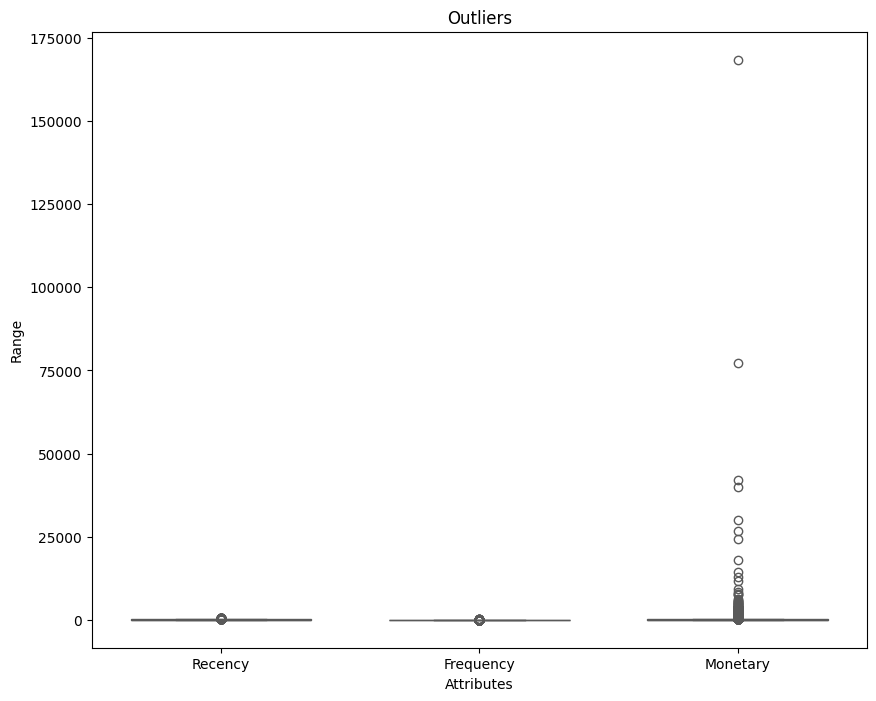

In [56]:
plt.rcParams['figure.figsize'] = [10, 8]
sns.boxplot(data=RFM2, orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers")
plt.ylabel("Range")
plt.xlabel("Attributes")

In [57]:
rfm_r_log = np.log(RFM2['Recency']+0.1) #log(0) is undefined
rfm_f_log = np.log(RFM2['Frequency'])
rfm_m_log = np.log(RFM2['Monetary']+0.1)

In [58]:
log_data = pd.DataFrame({'Monetary': rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

In [59]:
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12747.0,6.536097,0.741937,2.397895
12748.0,8.253595,-2.302585,5.347108
12749.0,4.589549,1.131402,1.609438
12820.0,4.065602,1.131402,1.386294


In [60]:
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.368472,0.716935
Recency,-0.368472,1.000000,-0.573982
Frequency,0.716935,-0.573982,1.000000


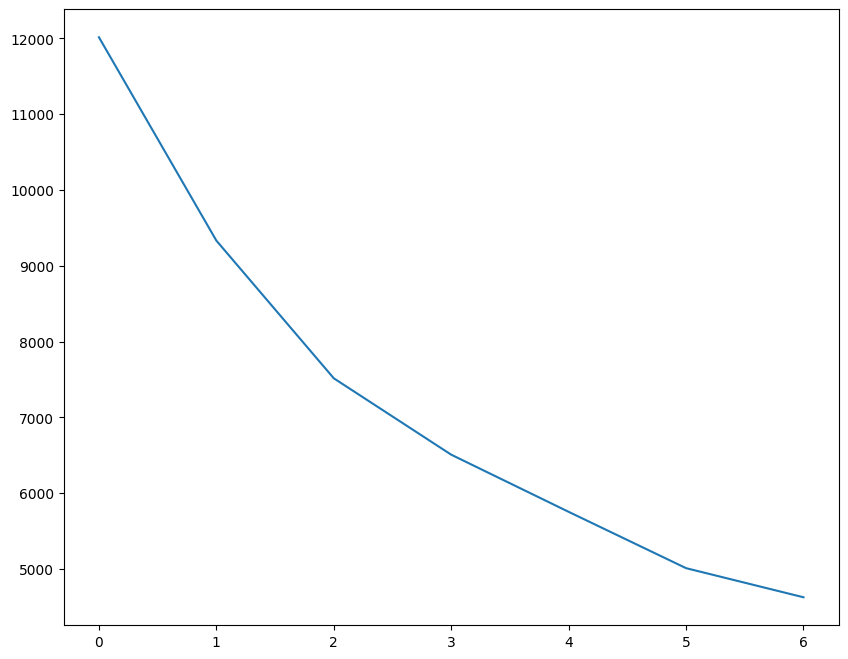

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
curve=[]
range = [2,3,4,5,6,7,8]
for clusters in range:
    kmeans = KMeans(n_clusters = clusters, max_iter = 50)
    kmeans.fit(log_data)
    curve.append(kmeans.inertia_)
plt.plot(curve)    

In [62]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming log_data is your DataFrame
matrix = log_data.values  # or use log_data.to_numpy()

# Make sure `kmeans`, `matrix`, and other variables are not defined as lists
range1=[2,3,4,5,6,7,8,9]
for n_clusters in range1:
    # If `kmeans` or any other variable was accidentally redefined as a list, rename it
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)


For n_clusters = 2 The average silhouette_score is: 0.3893778047545115
For n_clusters = 3 The average silhouette_score is: 0.3023041937392807
For n_clusters = 4 The average silhouette_score is: 0.3121419583901765
For n_clusters = 5 The average silhouette_score is: 0.29162550258719083
For n_clusters = 6 The average silhouette_score is: 0.2971152471372098
For n_clusters = 7 The average silhouette_score is: 0.2940320824507468
For n_clusters = 8 The average silhouette_score is: 0.2882028909230055
For n_clusters = 9 The average silhouette_score is: 0.2895205527649463


In [63]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.389


Text(0, 0.5, 'Monetary')

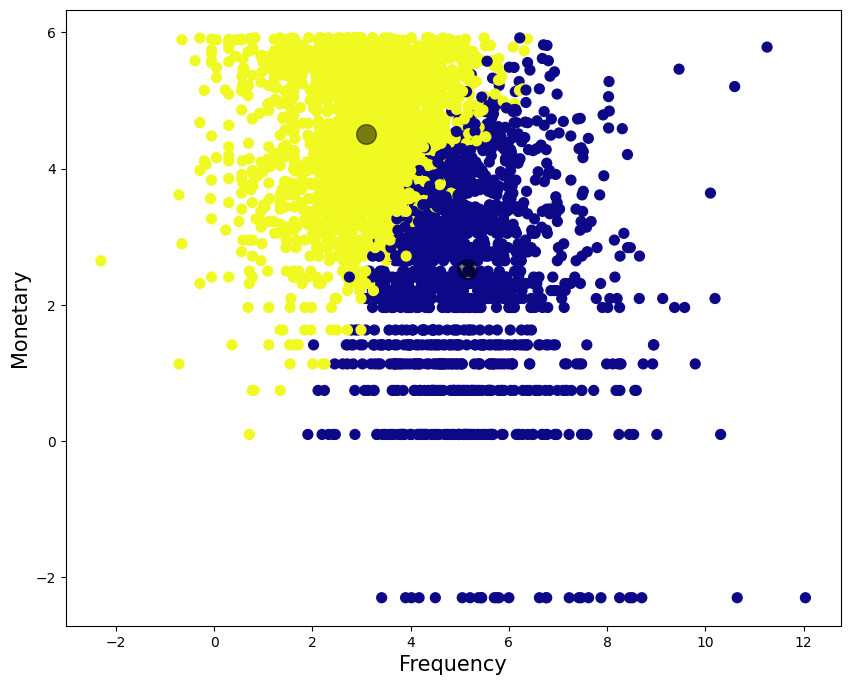

In [64]:
#create a scatter plot
plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers, s=50, cmap='plasma')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22040\2757440056.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)


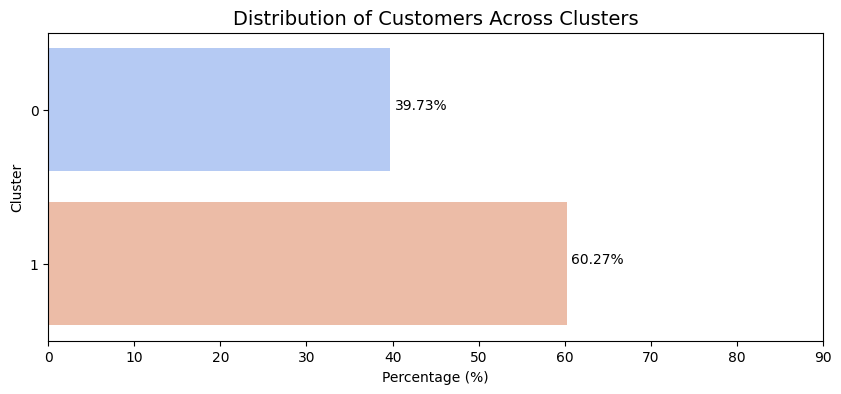

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Check if the 'Cluster' column exists in log_data
# If your cluster column has a different name, replace 'Cluster' with the correct name

if 'Cluster' not in log_data.columns:
    # Assuming the K-Means cluster column is named 'K-Means cluster' (or another name)
    log_data['Cluster'] = clusters_customers  # Ensure you have the K-Means cluster labels stored

# Calculate the percentage of customers in each cluster
cluster_percentage = (log_data['Cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
colors = sns.color_palette("coolwarm", len(cluster_percentage))  # Adjust the color palette
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value + 0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 100, 10))  # Adjusted ticks from 0 to 100%
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()


In [66]:
cluster_counts = log_data['Cluster'].value_counts().reset_index()

# Rename the columns for clarity
cluster_counts.columns = ['Cluster', 'Number of Customers']

# Display the result as a table
print(cluster_counts)

   Cluster  Number of Customers
0        1                 2363
1        0                 1558


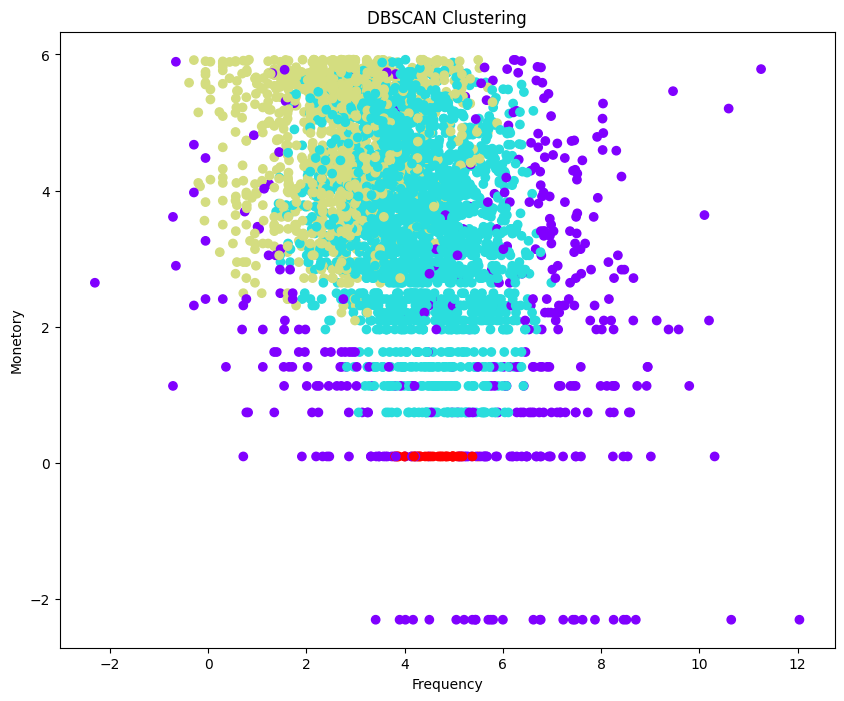

In [67]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan.fit(matrix)

# Plot the results
plt.scatter(matrix[:,0], matrix[:,1], c=dbscan.labels_, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Frequency')
plt.ylabel('Monetory')
plt.show()

In [68]:
import numpy as np
from collections import Counter

# Assuming 'labels_' contains the cluster labels assigned by DBSCAN
labels = dbscan.labels_  # or use the appropriate variable

# Count the number of occurrences of each cluster label
cluster_counts = Counter(labels)

# Display the number of customers in each cluster
print("Number of customers in each cluster:")
for cluster_label, count in cluster_counts.items():
    if cluster_label == -1:
        print(f"Noise (outliers): {count}")
    else:
        print(f"Cluster {cluster_label}: {count} customers")



Number of customers in each cluster:
Noise (outliers): 400
Cluster 0: 2211 customers
Cluster 1: 1274 customers
Cluster 2: 36 customers


In [69]:
data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID,Total_Cost,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,178500,15.30,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,178500,11.10,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,0,130470,54.08,2010-12-01
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,0,130470,25.50,2010-12-01
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,0,130470,17.85,2010-12-01


In [70]:
data_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16649 entries, 0 to 541890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   InvoiceNo           16649 non-null  object        
 1   StockCode           16649 non-null  object        
 2   Description         16649 non-null  object        
 3   Quantity            16649 non-null  int64         
 4   InvoiceDate         16649 non-null  datetime64[ns]
 5   UnitPrice           16649 non-null  float64       
 6   CustomerID          16649 non-null  float64       
 7   Country             16649 non-null  object        
 8   CustomerID_is_null  16649 non-null  int64         
 9   NewID               16649 non-null  int64         
 10  Total_Cost          16649 non-null  float64       
 11  Date                16649 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 1.7+ MB


In [71]:
data_uk.isnull().sum().sort_values(ascending = False)

InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID            0
Country               0
CustomerID_is_null    0
NewID                 0
Total_Cost            0
Date                  0
dtype: int64

In [72]:
data_uk['Date'] = pd.to_datetime(data_uk['Date'])
data_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16649 entries, 0 to 541890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   InvoiceNo           16649 non-null  object        
 1   StockCode           16649 non-null  object        
 2   Description         16649 non-null  object        
 3   Quantity            16649 non-null  int64         
 4   InvoiceDate         16649 non-null  datetime64[ns]
 5   UnitPrice           16649 non-null  float64       
 6   CustomerID          16649 non-null  float64       
 7   Country             16649 non-null  object        
 8   CustomerID_is_null  16649 non-null  int64         
 9   NewID               16649 non-null  int64         
 10  Total_Cost          16649 non-null  float64       
 11  Date                16649 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 1.7+ MB


In [73]:
data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID,Total_Cost,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,178500,15.30,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,178500,11.10,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,0,130470,54.08,2010-12-01
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,0,130470,25.50,2010-12-01
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,0,130470,17.85,2010-12-01


In [74]:
data_uk = data_uk.drop(columns=['InvoiceNo','StockCode','Quantity','UnitPrice','CustomerID','Country','CustomerID_is_null','Total_Cost'])

In [75]:
data_uk.head(5)

,Description,InvoiceDate,NewID,Date
0,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,178500,2010-12-01
7,HAND WARMER UNION JACK,2010-12-01 08:28:00,178500,2010-12-01
9,ASSORTED COLOUR BIRD ORNAMENT,2010-12-01 08:34:00,130470,2010-12-01
21,JAM MAKING SET WITH JARS,2010-12-01 08:34:00,130470,2010-12-01
25,BATH BUILDING BLOCK WORD,2010-12-01 08:35:00,130470,2010-12-01


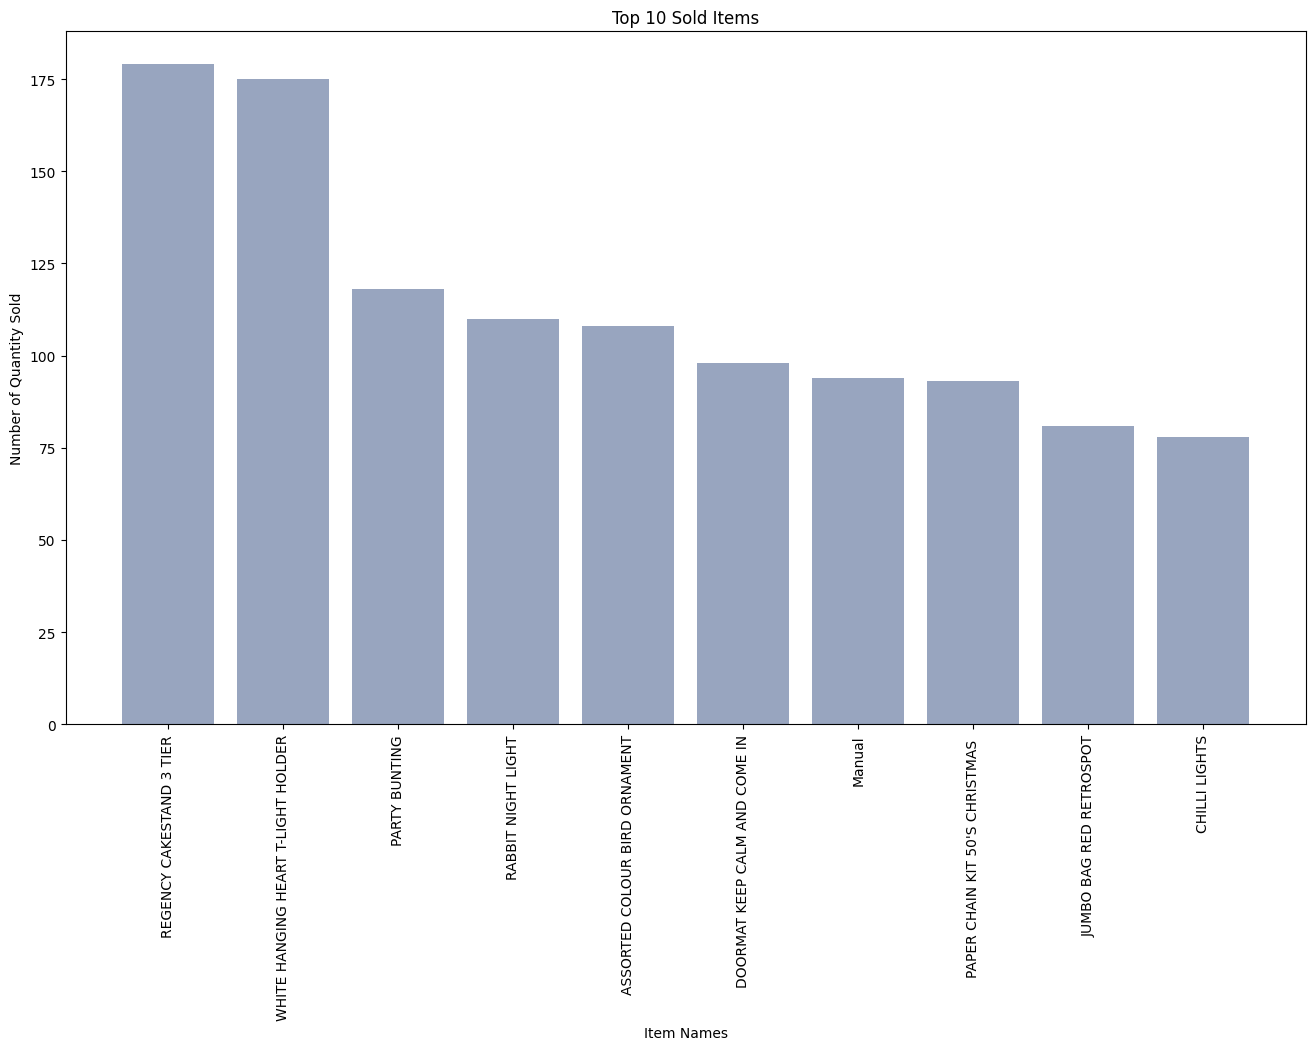

In [76]:
Item_dist = data_uk.groupby(by='Description').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False).head(10)
bars = Item_dist['Description']
height = Item_dist['Frequency']

x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))
plt.bar(x_pos, height, color=(0.2, 0.3, 0.5, 0.5))
plt.title('Top 10 Sold Items')
plt.xlabel("Item Names")
plt.ylabel('Number of Quantity Sold')
plt.xticks(x_pos, bars, rotation=90) 
plt.show()


In [77]:
data_date=data_uk.set_index(['InvoiceDate'])
data_date.head(5)

,Description,NewID,Date
InvoiceDate,,,
2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,178500,2010-12-01
2010-12-01 08:28:00,HAND WARMER UNION JACK,178500,2010-12-01
2010-12-01 08:34:00,ASSORTED COLOUR BIRD ORNAMENT,130470,2010-12-01
2010-12-01 08:34:00,JAM MAKING SET WITH JARS,130470,2010-12-01
2010-12-01 08:35:00,BATH BUILDING BLOCK WORD,130470,2010-12-01


In [78]:
data_date.shape

(16649, 3)

[Text(0.5, 0, 'date'), Text(0, 0.5, 'number of item')]

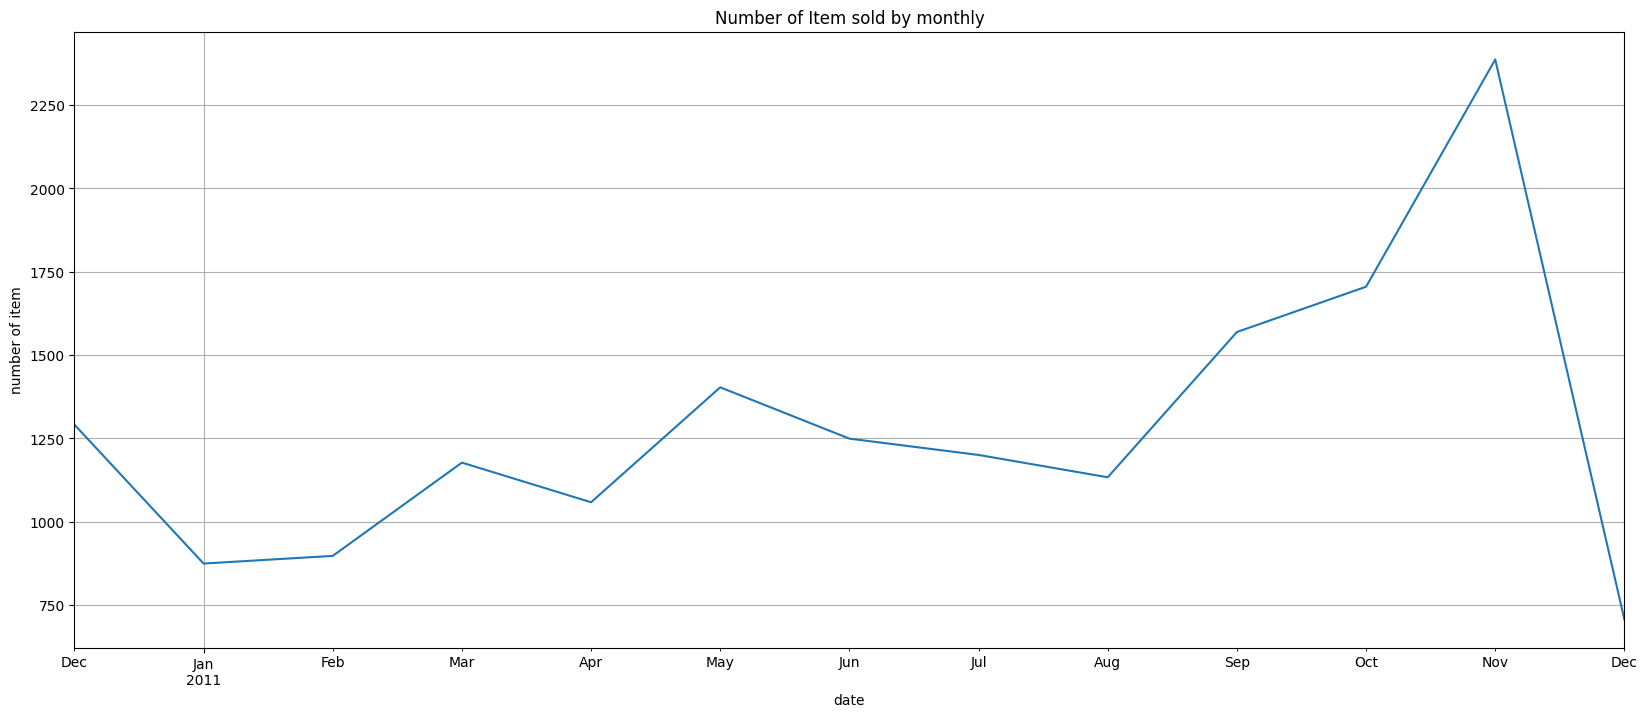

In [79]:
data_date.resample("M")["Description"].count().plot(figsize=(20,8),grid = True, title = 'Number of Item sold by monthly').set(xlabel='date',ylabel='number of item')

In [80]:
cust_level = data_uk[['NewID','Description']].sort_values(by='NewID',ascending=False)
cust_level['Description'] = cust_level['Description'].str.strip()
cust_level.head()

,NewID,Description
392716,182870,HAND WARMER OWL DESIGN
423939,182870,SET OF 3 WOODEN SLEIGH DECORATIONS
198716,182870,SMALL PURPLE BABUSHKA NOTEBOOK
263633,182830,BOX OF 9 PEBBLE CANDLES
225719,182830,WHITE HANGING HEART T-LIGHT HOLDER


In [81]:
transactions = [a[1]['Description'].tolist() for a in list(cust_level.groupby(['NewID']))]
transactions

[['MEDIUM CERAMIC TOP STORAGE JAR'],
 ['SWEETHEART RECIPE BOOK STAND',
  'GREEN JUICY FRUIT PHOTO FRAME',
  'WOOD BLACK BOARD ANT WHITE FINISH',
  'JUMBO BAG TOYS',
  'PEARL CRYSTAL PUMPKIN T-LIGHT HLDR',
  'WOOD BLACK BOARD ANT WHITE FINISH',
  'WELCOME  WOODEN BLOCK LETTERS',
  'WHITE HANGING HEART T-LIGHT HOLDER',
  'HOME BUILDING BLOCK WORD',
  'PAINTED METAL PEARS ASSORTED',
  'JUMBO BAG PEARS'],
 ['CHARLOTTE BAG DOLLY GIRL DESIGN',
  'CANDY SPOT HEART DECORATION',
  'EDWARDIAN PARASOL BLACK',
  'REGENCY TEAPOT ROSES',
  'ANTIQUE GLASS HEART DECORATION',
  'ANTIQUE GLASS DRESSING TABLE POT',
  "POPPY'S PLAYHOUSE BATHROOM",
  'DOORMAT ENGLISH ROSE',
  'REX CASH+CARRY JUMBO SHOPPER',
  'LARGE IVORY HEART WALL ORGANISER',
  'Manual',
  'MEDIUM CERAMIC TOP STORAGE JAR',
  '6 ROCKET BALLOONS',
  'NATURAL SLATE CHALKBOARD LARGE',
  'STRAWBERRY RAFFIA FOOD COVER',
  'RABBIT NIGHT LIGHT',
  'FLORAL FOLK STATIONERY SET',
  'BLUE HAPPY BIRTHDAY BUNTING',
  'AIRLINE BAG VINTAGE TOKYO 78',
  

In [82]:
from apyori import apriori

In [83]:
rules = apriori(transactions = transactions, min_support= 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2)

In [84]:
results = list(rules)

In [85]:
results

[RelationRecord(items=frozenset({'ALARM CLOCK BAKELIKE RED', 'ALARM CLOCK BAKELIKE GREEN'}), support=0.00204029584289722, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), items_add=frozenset({'ALARM CLOCK BAKELIKE RED'}), confidence=0.30769230769230765, lift=50.26923076923077), OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE RED'}), items_add=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), confidence=0.3333333333333333, lift=50.26923076923077)]),
 RelationRecord(items=frozenset({'ANTIQUE SILVER T-LIGHT GLASS', 'VICTORIAN GLASS HANGING T-LIGHT'}), support=0.00204029584289722, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ANTIQUE SILVER T-LIGHT GLASS'}), items_add=frozenset({'VICTORIAN GLASS HANGING T-LIGHT'}), confidence=0.1702127659574468, lift=13.348085106382978), OrderedStatistic(items_base=frozenset({'VICTORIAN GLASS HANGING T-LIGHT'}), items_add=frozenset({'ANTIQUE SILVER T-LIGHT GLASS'}), confidence=0.16, lift=13.3480

In [86]:
def inspect(results):
    ant = [tuple(result[2][0][0])[0] for result in results]  
    con = [tuple(result[2][0][1])[0] for result in results]  
    supports = [result[1] for result in results]             
    confidence = [result[2][0][2] for result in results]     
    lifts = [result[2][0][3] for result in results]          
    return list(zip(ant, con, supports, confidence, lifts))

# Create DataFrame from the inspected results
resultsindataframe = pd.DataFrame(inspect(results), columns=['Antecedent', 'Consequent', 'Support', 'Confidence', 'Lift'])


In [87]:
resultsindataframe.nlargest(n=5, columns = 'Lift')

,Antecedent,Consequent,Support,Confidence,Lift
0,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,0.00204,0.307692,50.269231
9,PINK REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,0.00204,0.320000,30.602927
6,HEART OF WICKER SMALL,SMALL WHITE HEART OF WICKER,0.00255,0.151515,19.803030
7,JUMBO BAG APPLES,JUMBO BAG RED RETROSPOT,0.00306,0.279070,17.368771
10,RABBIT NIGHT LIGHT,RED TOADSTOOL LED NIGHT LIGHT,0.00204,0.096386,16.431640
